In [1]:
import pandas as pd

In [7]:
#Read the file
data=pd.read_csv("NewspaperData.csv")
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [4]:
#finding the correlation between input and output variables
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

C:\Users\91701\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

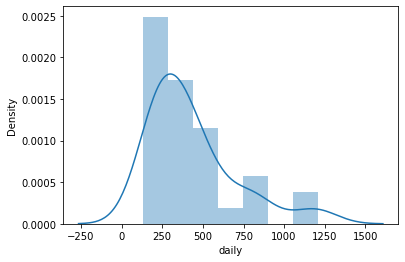

In [10]:
sns.distplot(data["daily"])

C:\Users\91701\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

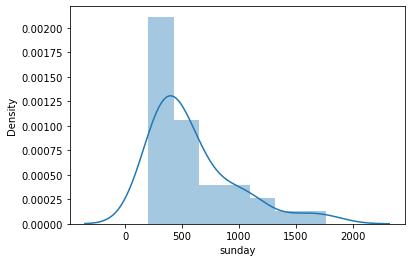

In [11]:
sns.distplot(data["sunday"])

In [1]:
import statsmodels.formula.api as smf

In [12]:
#building the model
model=smf.ols("sunday~daily",data=data).fit()

<AxesSubplot:xlabel='daily', ylabel='sunday'>

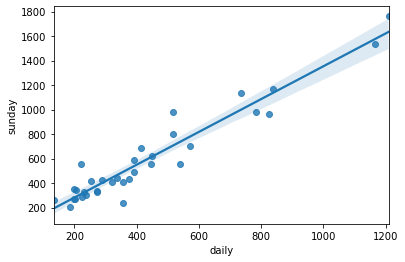

In [13]:
sns.regplot(x="daily",y="sunday",data=data)

In [14]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [17]:
print(model.tvalues, "\n",model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [20]:
model.rsquared,model.rsquared_adj

(0.9180596895873294, 0.9154990548869335)

In [22]:
#Entering the new values  in input column
newdata=pd.Series([200,300])

In [23]:
datapred=pd.DataFrame(newdata,columns=['daily'])

In [24]:
#predicting the output for given input
model.predict(datapred)

0    281.778581
1    415.750057
dtype: float64